In [287]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.model_selection import train_test_split
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dropout, Dense
from tensorflow.keras.callbacks import EarlyStopping
from sklearn.metrics import confusion_matrix, classification_report

**Reading Data File**

In [288]:
df =pd.read_csv("cleaned_data (1).csv")
df.head()

,TimeStamp,Ambient Temperature,Distance Travelled,Engine Coolant Temperature,Engine Fuel Rate,Engine Intake Manifold Pressure,Engine Intake Manifold Temperature,Engine Oil Pressure,Engine Oil Temperature,Engine RPM,Idle,Machine Running Hours,Machine Speed,Operational,Transmission Hours,Transmission Oil Pressure,Transmission Oil Temperature,status
0,2016-09-01 19:10:03,18.0,68747.901,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,10289.777283,0.0,0.0,7631.700765,0.1,0.0,1
1,2016-09-01 19:10:08,18.0,68747.901,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,10289.777283,0.0,0.0,7631.700765,0.1,0.0,1
2,2016-09-01 19:10:13,18.0,68747.901,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,10289.777283,0.0,0.0,7631.700765,0.1,0.0,1
3,2016-09-01 19:10:18,18.0,68747.901,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,10289.777283,0.0,0.0,7631.700765,0.0,0.0,1
4,2016-09-01 19:10:23,18.0,68747.901,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,10289.777283,0.0,0.0,7631.700765,0.1,0.0,1


**Let's check for null values**

In [289]:
df.isna().sum()

TimeStamp                             0
Ambient Temperature                   0
Distance Travelled                    0
Engine Coolant Temperature            0
Engine Fuel Rate                      0
Engine Intake Manifold Pressure       0
Engine Intake Manifold Temperature    0
Engine Oil Pressure                   0
Engine Oil Temperature                0
Engine RPM                            0
Idle                                  0
Machine Running Hours                 0
Machine Speed                         0
Operational                           0
Transmission Hours                    0
Transmission Oil Pressure             0
Transmission Oil Temperature          0
status                                0
dtype: int64

**Checking for Duplicated Data**

In [290]:
df.duplicated().sum()

0

**let's Check Data information and memory being utilized**

In [291]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 599543 entries, 0 to 599542
Data columns (total 18 columns):
 #   Column                              Non-Null Count   Dtype  
---  ------                              --------------   -----  
 0   TimeStamp                           599543 non-null  object 
 1   Ambient Temperature                 599543 non-null  float64
 2   Distance Travelled                  599543 non-null  float64
 3   Engine Coolant Temperature          599543 non-null  float64
 4   Engine Fuel Rate                    599543 non-null  float64
 5   Engine Intake Manifold Pressure     599543 non-null  float64
 6   Engine Intake Manifold Temperature  599543 non-null  float64
 7   Engine Oil Pressure                 599543 non-null  float64
 8   Engine Oil Temperature              599543 non-null  float64
 9   Engine RPM                          599543 non-null  float64
 10  Idle                                599543 non-null  float64
 11  Machine Running Hours     

**Data Stats**

In [292]:
df.describe()

,Ambient Temperature,Distance Travelled,Engine Coolant Temperature,Engine Fuel Rate,Engine Intake Manifold Pressure,Engine Intake Manifold Temperature,Engine Oil Pressure,Engine Oil Temperature,Engine RPM,Idle,Machine Running Hours,Machine Speed,Operational,Transmission Hours,Transmission Oil Pressure,Transmission Oil Temperature,status
count,599543.000000,599543.000000,599543.000000,599543.000000,599543.000000,599543.000000,599543.000000,599543.000000,599543.000000,599543.000000,599543.000000,599543.000000,599543.000000,599543.000000,599543.000000,599543.000000,599543.000000
mean,26.615177,71491.750697,80.393681,44.140369,0.572489,66.728310,3.002635,80.393709,1232.691283,0.142139,10647.796057,6.347148,0.690610,7907.350409,11.867285,87.251542,0.887644
std,4.247438,1618.362533,11.951166,52.361379,0.800331,10.014632,1.584924,11.951157,789.499339,0.349158,211.979253,7.059616,0.462216,162.655949,5.387034,15.138933,0.460530
min,6.200000,68747.901000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,10289.777283,0.000000,0.000000,7631.700765,0.000000,-50.000000,-1.000000
25%,23.800000,70071.544000,80.000000,10.950000,0.020000,64.000000,1.920000,80.000000,694.000000,0.000000,10463.257827,0.000000,0.000000,7765.955116,12.600000,86.600000,1.000000
50%,27.700000,71500.872000,81.000000,13.450000,0.140000,66.000000,3.680000,81.000000,1284.000000,0.000000,10645.360727,3.800000,1.000000,7906.402184,13.400000,90.400000,1.000000
75%,29.700000,72911.409000,85.000000,69.000000,0.840000,71.000000,4.360000,85.000000,2004.000000,0.000000,10834.010263,10.400000,1.000000,8050.562049,14.900000,94.600000,1.000000
max,39.500000,74282.239000,106.000000,161.750000,2.320000,87.000000,6.840000,106.000000,2580.000000,1.000000,11016.688209,27.500000,1.000000,8190.157938,28.300000,115.300000,1.000000


In [293]:
# corrrelation with target variable
df.corr()['status'].sort_values()

Machine Running Hours                -0.112408
Transmission Hours                   -0.111493
Distance Travelled                   -0.109742
Idle                                 -0.004089
Engine Intake Manifold Pressure       0.127287
Engine Fuel Rate                      0.143286
Machine Speed                         0.148729
Engine Oil Pressure                   0.217398
Engine Intake Manifold Temperature    0.220466
Engine RPM                            0.238714
Operational                           0.248626
Ambient Temperature                   0.257631
Engine Oil Temperature                0.279286
Engine Coolant Temperature            0.279287
Transmission Oil Pressure             0.304115
Transmission Oil Temperature          0.343850
status                                1.000000
Name: status, dtype: float64

# Data Visualization

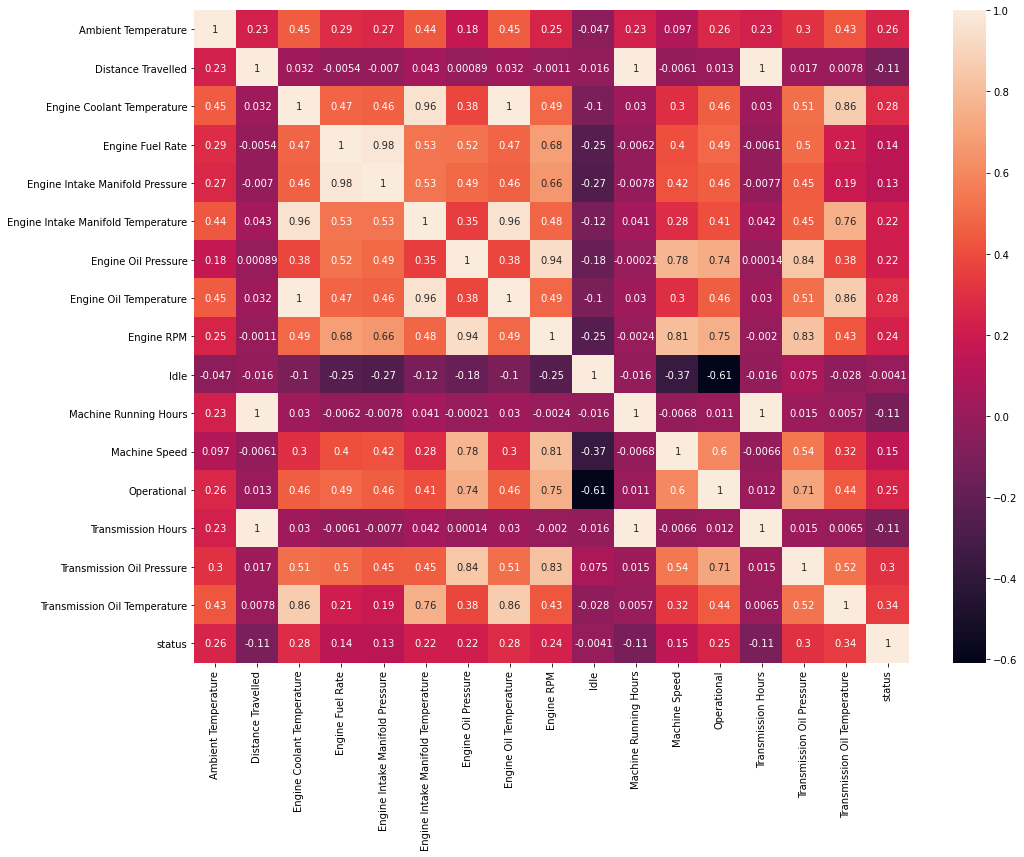

In [294]:
plt.figure(figsize=(16,12))
sns.heatmap(df.corr(),annot=True)
plt.show()

**checking for Data samples**

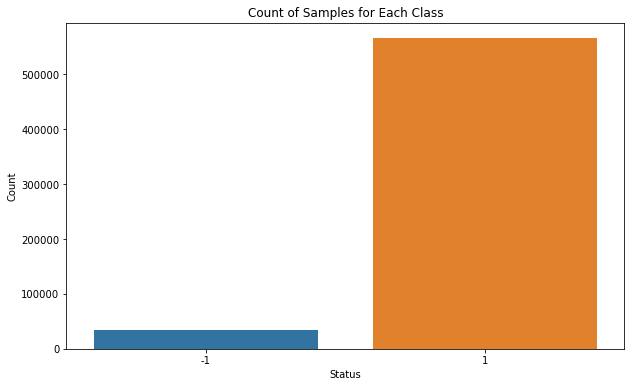

In [295]:
plt.figure(figsize=(10, 6))
sns.countplot(x='status', data=df)
plt.title('Count of Samples for Each Class')
plt.xlabel('Status')
plt.ylabel('Count')
plt.show()

**sorting values based on timestamp**

In [296]:
df = df.sort_values('TimeStamp')
df.head()

,TimeStamp,Ambient Temperature,Distance Travelled,Engine Coolant Temperature,Engine Fuel Rate,Engine Intake Manifold Pressure,Engine Intake Manifold Temperature,Engine Oil Pressure,Engine Oil Temperature,Engine RPM,Idle,Machine Running Hours,Machine Speed,Operational,Transmission Hours,Transmission Oil Pressure,Transmission Oil Temperature,status
0,2016-09-01 19:10:03,18.0,68747.901,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,10289.777283,0.0,0.0,7631.700765,0.1,0.0,1
1,2016-09-01 19:10:08,18.0,68747.901,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,10289.777283,0.0,0.0,7631.700765,0.1,0.0,1
2,2016-09-01 19:10:13,18.0,68747.901,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,10289.777283,0.0,0.0,7631.700765,0.1,0.0,1
3,2016-09-01 19:10:18,18.0,68747.901,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,10289.777283,0.0,0.0,7631.700765,0.0,0.0,1
4,2016-09-01 19:10:23,18.0,68747.901,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,10289.777283,0.0,0.0,7631.700765,0.1,0.0,1


In [297]:
df = df.drop(['TimeStamp'], axis=1)

In [298]:
df.head()

,Ambient Temperature,Distance Travelled,Engine Coolant Temperature,Engine Fuel Rate,Engine Intake Manifold Pressure,Engine Intake Manifold Temperature,Engine Oil Pressure,Engine Oil Temperature,Engine RPM,Idle,Machine Running Hours,Machine Speed,Operational,Transmission Hours,Transmission Oil Pressure,Transmission Oil Temperature,status
0,18.0,68747.901,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,10289.777283,0.0,0.0,7631.700765,0.1,0.0,1
1,18.0,68747.901,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,10289.777283,0.0,0.0,7631.700765,0.1,0.0,1
2,18.0,68747.901,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,10289.777283,0.0,0.0,7631.700765,0.1,0.0,1
3,18.0,68747.901,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,10289.777283,0.0,0.0,7631.700765,0.0,0.0,1
4,18.0,68747.901,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,10289.777283,0.0,0.0,7631.700765,0.1,0.0,1


**checking number of classes**

In [299]:
df['status'].unique()

array([ 1, -1])

**# Encoding the labels**

In [300]:
y = df['status']
y = LabelEncoder().fit_transform(y)



**Standardize the features**

In [301]:

x = df.drop(['status'], axis=1)
x = StandardScaler().fit_transform(x)

# **Creating sequences**

In the context of time series data, "sequence length" refers to the number of consecutive data points (or time steps) that are grouped together as input to the model. It determines how far back in time the model looks to make predictions, influencing both the model's ability to capture historical patterns and its computational requirements

In [302]:
# Creating sequences
def create_sequences(data, labels, sequence_length):
    sequences = []
    label_sequences = []
    for i in range(len(data) - sequence_length):
        sequences.append(data[i:i+sequence_length])
        label_sequences.append(labels[i+sequence_length])
    return np.array(sequences), np.array(label_sequences)

# you can take seq length of your choice
sequence_length = 10 
x_seq, y_seq = create_sequences(x, y, sequence_length)

In [303]:
# Split into training and test sets
x_train, x_test, y_train, y_test = train_test_split(x_seq, y_seq, test_size=0.2, random_state=101)
x_train, x_val, y_train, y_val = train_test_split(x_train, y_train, test_size=0.25, random_state=101) 

In [304]:
x.shape[1]

16

**LSTM MODEL**

In [305]:
model = Sequential()
model.add(LSTM(128, return_sequences=True, input_shape=(sequence_length, x.shape[1])))
model.add(Dropout(0.2))
model.add(LSTM(128, return_sequences=True))
model.add(Dropout(0.2))
model.add(LSTM(128, return_sequences=True))
model.add(Dropout(0.2))
model.add(LSTM(128, return_sequences=True))
model.add(Dropout(0.2))
model.add(LSTM(128))
model.add(Dense(1, activation='sigmoid'))  
model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])

# Model summary
model.summary()

Model: "sequential_20"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
lstm_100 (LSTM)              (None, 10, 128)           74240     
_________________________________________________________________
dropout_80 (Dropout)         (None, 10, 128)           0         
_________________________________________________________________
lstm_101 (LSTM)              (None, 10, 128)           131584    
_________________________________________________________________
dropout_81 (Dropout)         (None, 10, 128)           0         
_________________________________________________________________
lstm_102 (LSTM)              (None, 10, 128)           131584    
_________________________________________________________________
dropout_82 (Dropout)         (None, 10, 128)           0         
_________________________________________________________________
lstm_103 (LSTM)              (None, 10, 128)         

# Model Training

In [306]:
early_stopping = EarlyStopping(monitor='val_loss', patience=10, restore_best_weights=True)

# Train the model
hist = model.fit(x_train, y_train,
                 epochs=50,
                 validation_data=(x_val, y_val),
                 batch_size=200,
                 verbose=1,
                 callbacks=[early_stopping])

Epoch 1/50
1799/1799 [==============================] - 18s 10ms/step - loss: 0.0989 - accuracy: 0.9662 - val_loss: 0.0718 - val_accuracy: 0.9778
Epoch 2/50
1799/1799 [==============================] - 17s 9ms/step - loss: 0.0635 - accuracy: 0.9797 - val_loss: 0.0560 - val_accuracy: 0.9818
Epoch 3/50
1799/1799 [==============================] - 17s 9ms/step - loss: 0.0505 - accuracy: 0.9840 - val_loss: 0.0469 - val_accuracy: 0.9850
Epoch 4/50
1799/1799 [==============================] - 17s 9ms/step - loss: 0.0433 - accuracy: 0.9859 - val_loss: 0.0398 - val_accuracy: 0.9869
Epoch 5/50
1799/1799 [==============================] - 17s 9ms/step - loss: 0.0385 - accuracy: 0.9873 - val_loss: 0.0418 - val_accuracy: 0.9852
Epoch 6/50
1799/1799 [==============================] - 17s 10ms/step - loss: 0.0332 - accuracy: 0.9886 - val_loss: 0.0394 - val_accuracy: 0.9873
Epoch 7/50
1799/1799 [==============================] - 17s 9ms/step - loss: 0.0309 - accuracy: 0.9891 - val_loss: 0.0284 - val_

**Model Evaluation**

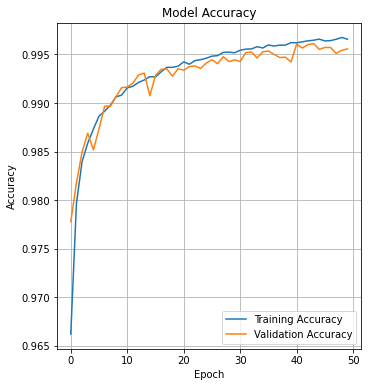

In [307]:
plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
plt.plot(hist.history['accuracy'], label='Training Accuracy')
plt.plot(hist.history['val_accuracy'], label='Validation Accuracy')
plt.title('Model Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()
plt.grid(True)

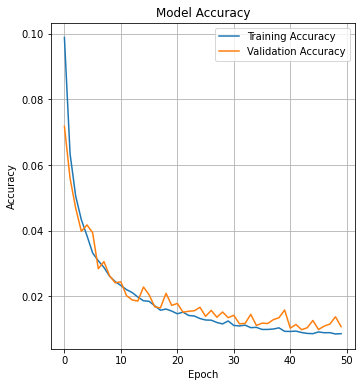

In [308]:
plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
plt.plot(hist.history['loss'], label='Training Accuracy')
plt.plot(hist.history['val_loss'], label='Validation Accuracy')
plt.title('Model Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()
plt.grid(True)

In [309]:
# Evaluating the model on the test set (unseen data)
test_loss, test_accuracy = model.evaluate(x_test, y_test)
print(f'Test loss: {test_loss}, Test accuracy: {test_accuracy}')

# Predicion and calculate confusion matrix and classification report
y_pred = model.predict(x_test)
y_pred_classes = np.round(y_pred)
y_true = np.round(y_test)

3748/3748 [==============================] - 14s 4ms/step - loss: 0.0103 - accuracy: 0.9958
Test loss: 0.010329008102416992, Test accuracy: 0.9958050847053528


In [310]:
cr = classification_report(y_true, y_pred_classes)
print(f'Classification Report:\n{cr}')

Classification Report:
              precision    recall  f1-score   support

           0       0.97      0.96      0.96      6735
           1       1.00      1.00      1.00    113172

    accuracy                           1.00    119907
   macro avg       0.98      0.98      0.98    119907
weighted avg       1.00      1.00      1.00    119907



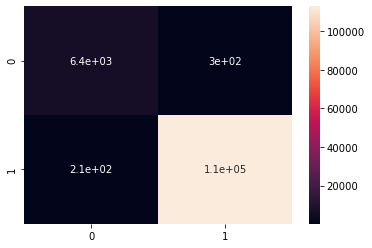

In [311]:
cm = confusion_matrix(y_true, y_pred_classes)
sns.heatmap(cm,annot=True)

**Saving Trained Model**

In [312]:
model.save('trained_model.h5')

# Conclusion

*Classification Report Metrics:
Precision:

Precision for class 0 (Negative Class): Precision measures the accuracy of positive predictions. For class 0, it indicates that out of all instances predicted as class 0, 97% were actually class 0.
Precision for class 1 (Positive Class): For class 1, which is likely the majority class (given the high support), it indicates that all instances predicted as class 1 were indeed class 1.
Recall:

Recall for class 0: Recall (also called sensitivity or true positive rate) measures the proportion of actual positives that were correctly identified. For class 0, 96% of actual class 0 instances were correctly classified.
Recall for class 1: For class 1, which has a high recall of 100%, all actual class 1 instances were correctly classified.
F1-score:

F1-score for class 0: The F1-score is the harmonic mean of precision and recall, providing a single metric to evaluate a classifier. For class 0, the F1-score is 0.96, indicating good balance between precision and recall.
F1-score for class 1: The F1-score for class 1 is 1.00, which signifies perfect precision and recall balance, likely due to the high recall and precision values.
Support:

Support for class 0: The number of actual occurrences of class 0 in the test dataset is 6,735.
Support for class 1: The number of actual occurrences of class 1 is 113,172, indicating this class dominates the dataset.
Test Results:
Test Loss: The calculated loss on the test dataset is 0.0103, which indicates how well the model's predictions match the true labels. Lower values indicate better performance.

Test Accuracy: The test accuracy of 99.58% suggests that the model correctly classified 99.58% of the test dataset.

Summary:
The classification report and test results indicate a highly accurate model, especially for predicting class 1, which is the majority class. Class 0 also shows strong performance with high precision and recall values, though it is a smaller proportion of the dataset. The model's high accuracy and balanced F1-scores indicate robust performance across both classes in the dataset.*